<a href="https://colab.research.google.com/github/syeong1218/python/blob/master/SMILES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

조원 : 유순영, 구교훈, 임영준

# **SMILES(Simplified Molecular Input Line Entry System)**
## 1. SMILES의 정의
SMILES(Simplified Molecular Input Line Entry System)은 화학물질의 구조를 짧은 ASCII를 이용하여 문자열로 나타내는 방법입니다. 즉, 화학정보학을 위해 2차원, 3차원의 구조를 가진 분자와 화학반응을 문자열로 표기한 간단한 화학 언어입니다. 그래서 적은 양의 데이터를 이용하여 화학물질을 나타낼 수 있습니다.

RDkit는 화학정보학을 위한 Open-source module로 이를 다운받아야 SMILES를 사용할 수 있다. 코랩에서 아래 코드를 실행시키면 됩니다.



#### RDkit 다운코드

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-11-30 05:18:13--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   234MB/s    in 0.3s    

2019-11-30 05:18:13 (234 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

#### RDkit import

In [0]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

위의 Draw는 Python에서 SMILES로 표현한 화학물질을 Output에서 그림으로 출력하게 하는 함수입니다. Draw 함수를 import하지 않으면 SMILES의 저장 위치가 출력됩니다. 그래서 
밑에서 두 번째까지의 코드를 default 하겠습니다. 또한 화학적으로 불가능한 화합물의 경우 출력이 되지 않습니다.

**SMILES의 활용 분야**
  - 데이터베이스 접근의 키
  - 연구자들의 화학정보 변환 메커니즘
  - 화학 데이터 입력 시스템
  - 화학 시스템이나 AI를 위한 언어

## 2. 정규화(Canonicalization)
분자를 묘사하기 위한 2차원의 그림입니다. 원자와 결합에 대해서만  나타낸 SMILES을 'generic SMILES'라고 합니다. 일반적으로 하나의 화학물질에 대해 결과값은 동일하지만 다양한 SMILES로 입력할 수 있습니다.

In [0]:
a = Chem.MolFromSmiles('OCN')

In [0]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCN'))

'NCO'

In [0]:
Chem.MolToSmiles(Chem.MolFromSmiles('N-C-O'))

'NCO'

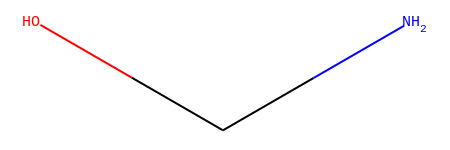

In [0]:
a

SMILES를 다르게 입력하더라도 결과값은 동일합니다.


따라서 어떤 SMILES 을 입력하더라도 유일하게 자체적으로 하나의 SMILES으로 처리하는 것을 ‘unique SMILES'이라 하고 이를 형성하기 위한 알고리즘이 존재합니다.
동위원소, 카이랄을 표현하기위한 SMILES를 'isomeric SMILES'이라 합니다. unique SMILES와 isomeric SMILES가 합해진 형태를 'absolute SMILES'이라 합니다.

## 3. SMILES 규칙(SMILES Sepcification Rules)
- SMILES는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현합니다.
- 수소원자는 생략하거나, 포함해도 됩니다.
- 방향족 물질들은 직관적으로 명시하거나 Kekulé form으로 분류할 수 있습니다.
- 대표적으로 5가지의 규칙이 있습니다. 
  1. 원자(atom) 
  2. 결합(bond)
  3. 가지(branch)
  4. 고리닫힘(ring closure)
  5. 단절(disconnection) 

### 3.1 원자(atom) 

- 수소를 포함하지 않는 단일원자는 [ ]사용합니다.organic subset는 [ ] 없이 쓰이기도 합니다.

- 최소 원자가 전자를 갖는다고 인식합니다.

      B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), 할로겐족(1)

- 지방족 탄소는 대문자 'C' 로, 방향족 탄소는 'c'로 명시합니다.

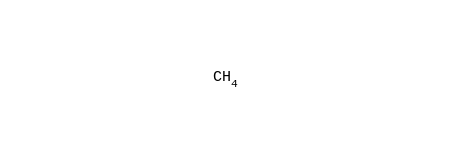

In [0]:
a = Chem.MolFromSmiles('C') # 수소를 생략해도 출력값에 포함됩니다.
a

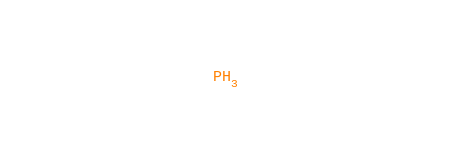

In [0]:
a = Chem.MolFromSmiles('P')
a

- '$[]$'속의 수소와 형식전하는 반드시 명시되어야 합니다. - 결합된 수소의 수는 H 와 숫자로 표현됩니다.
- 형식전하는 + 혹은 - 로 표시되어야 합니다. 명시되어 있지 않으면 전하는 0으로 가정합니다.
$[Fe++] = [Fe+2]$

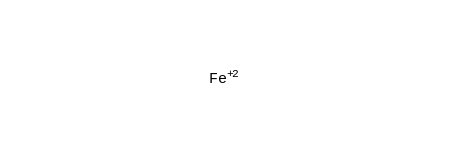

In [0]:
a = Chem.MolFromSmiles('[Fe++]')
a

### 3.2 결합(Bonds)
- 단일 결합은 생략하거나 '-'기호를 사용한다.
- 이중 결합은 '='기호를 사용합니다.
- 삼중 결합은 '#'기호를 사용합니다.
- 방향족 결합은 생락하거나 ':'기호를 사용합니다.

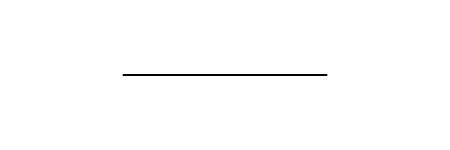

In [0]:
a  = Chem.MolFromSmiles('CC')
a

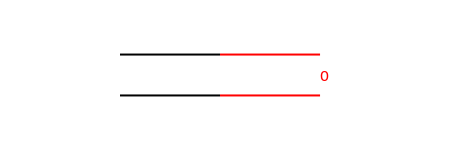

In [0]:
a = Chem.MolFromSmiles('O=C')
a

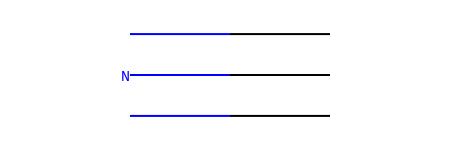

In [0]:
a = Chem.MolFromSmiles('C#N') 
a

이와 같은 규칙을 이용하여 6-hydroxy-1,4-hexadiene을 표현해보면

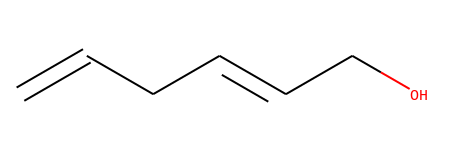

In [0]:
a = Chem.MolFromSmiles('C=CCC=CCO')
a

### 3.3 가지(Branches ; 치환기, 알킬기)
- 가지들은 중첩되거나 쌓일 수 있으며, 소괄호`()`로 묶어 결합 원소의 오른쪽에 써줍니다.

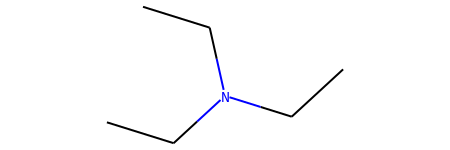

In [0]:
Triethylamine = Chem.MolFromSmiles('CCN(CC)CC') 
Triethylamine

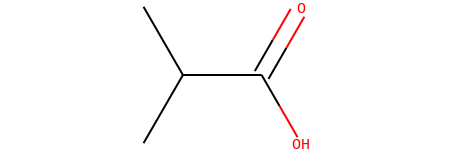

In [0]:
Isobutyric_acid = Chem.MolFromSmiles('CC(C)C(=O)O')
Isobutyric_acid

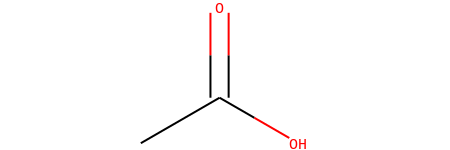

In [0]:
acetic_acid = Chem.MolFromSmiles('CC(=O)O')
acetic_acid

### 3.4 고리구조(Cyclic Structures)
- 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현합니다.

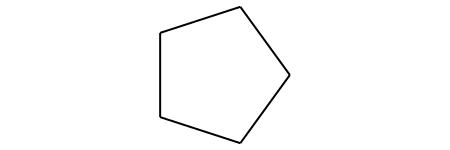

In [0]:
cyclopentane = Chem.MolFromSmiles('C1CCCC1')
cyclopentane

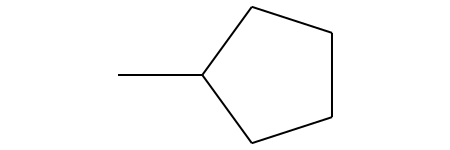

In [0]:
m = Chem.MolFromSmiles('C1CCC(C)C1')
m

- 동일한 화학물을 여러 방법으로 표현할 수 있고, 한 가지 분자의 다양한 표현은 우선순위가 없습니다.

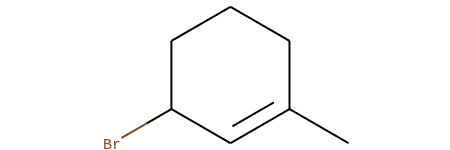

In [0]:
mbc1 = Chem.MolFromSmiles('CC1=CC(Br)CCC1')
mbc1

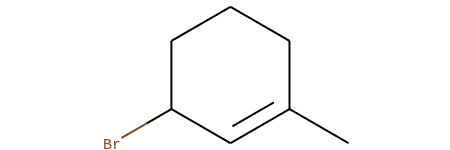

In [0]:
mbc2 = Chem.MolFromSmiles('CC1=CC(CCC1)Br')
mbc2

- 한 원자는 하나 이상의 `ring closure`을 가질 수 있습니다. 아래와 같은구조로 설명할 수 있습니다.

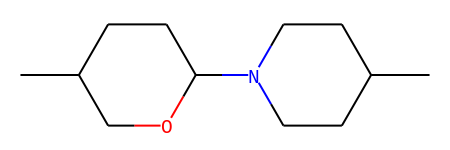

In [0]:
m = Chem.MolFromSmiles('O1CC(C)CCC1N1CCC(C)CC1')
m

### 3.5 비결합 구조(Disconnected Structures)
- 연결되지 않은 혼합물은 ' . '을 사용하여 각각의 구조들을 분리시킵니다.
- 이온 혹은 리간드(ligands)의 연결은 순서에 상관없이 사용가능합니다. 한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없스니다.
- 필요에 따라, 한 이온의 SMILES이 sodium phenoxide(석탄산나트륨)와 같이 다른 이온에 삽입될 수 있습니다.



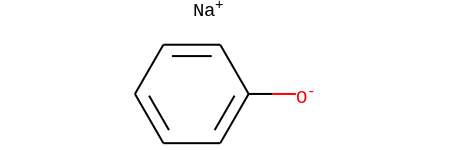

In [0]:
m = Chem.MolFromSmiles('[Na+].[O-]c1ccccc1')
m

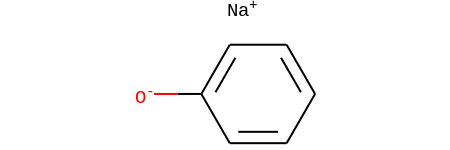

In [0]:
m = Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
m

- 원자 명시에 따른 자릿수가 같은 쌍은 서로 결합됨을 의미합니다.

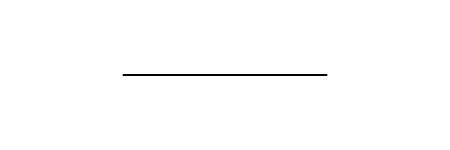

In [0]:
C_C = Chem.MolFromSmiles('C1.C1')
C_C

## 4. 이성질체 SMILES(Isomeric SMILES)

- 동위원소, 이중결합의 구조, 카이랄성을 규정합니다.
- IUPAC 명명법과 CIP 명명법과는 다르게 카이랄성을 명명합니다.
- 모든 화합물의 카이랄성이 알려져 있지는 않기 때문에, 가능한 카이랄성만을 표기합니다.


### 4.1 동위원소(Isotopic Specification)
- 동위원소는 [원자량 + 원자기호] 로 표기합니다.

SMILES | Name
---- | ----
$[12C]$ | carbon-12
$[13C]$ | carbon-13
$[C]$ | carbon(unspecified mass)
$[13CH4]$ | C-13 methane

### 4.2 이중결합 배치(Configuration Around Double Bonds)
- 이중결합의 구조 이성질체는 결합의 방향을 나타내며 '/'와'\'로 명시합니다.
- '/'와'\'는 결합된 원자들 간의 상대적인 위치를 나타내는 것으로, 이중결합으로 연결될 때에만 의미를 갖습니다.

>**E,Z체계**<br>
E(entgegon) : 반대편이라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **반대 위치**에 존재할 경우(≒trans-)<br>
Z(zusammen) : 함께라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **같은 위치**에 존재할 경우(≒cis-)<br>
Ex) E- and Z-1,2-dibromoethene


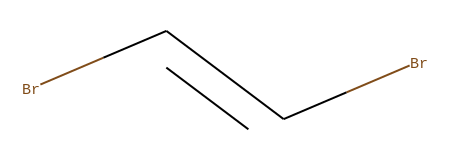

In [0]:
E1 = Chem.MolFromSmiles('Br/C=C/Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 같으면 E 방향입니다.
E1

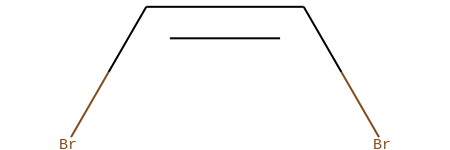

In [0]:
E2 = Chem.MolFromSmiles('Br/C=C\Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 반대면 Z 방향입니다.
E2

- SMILES과 CIP의 카이랄표현의 차이점은 SMILES은 국부적인 카이랄성(local chirality)를 표현할 수 있다는 점입니다.

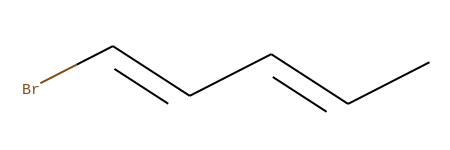

In [0]:
S1 = Chem.MolFromSmiles('Br/C=C/C=C/C')
S1

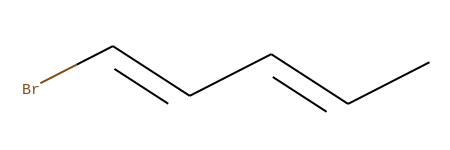

In [0]:
S2 = Chem.MolFromSmiles('Br/C=C/C=CC')
S2

### 4.3 사면체의 중심의 구조(Configuration Around Tetrahedral Centers)
* SMILES은 국부적 카이랄성을 기반으로한 가장 일반적인 형식의 명시법을 사용합니다.
* SMILES에서 사면체의 중심은 카이랄 원자의 원자 기호에 카이랄이라는 명시(@ 혹은 @@)를 합니다. '@'는 이웃하는 원자들이 반시계로 표현되어 있다는 것을 의미하고 '@@'는 이웃하는 원자들이 시계로 표현되어 있다는 것을 의미합니다.
* **카이랄성(Chirality):**<br>
거울상에 포갤 수 없는 분자를 카이랄(chiral)이라 합니다.<br>
같은 분자식이라 하여도 입체구조에 의해 서로 다른 화합물입니다. 이를 입체 이성질체라고 합니다. <br>
카이랄성의 가장 일반적인 원인은 네 개의 서로 다른 치환기가 결합된 탄소에서 가장 많이 볼 수 있는 정사면체인 원자 때문입니다.<br>
네 개의 서로 다른 치환기체가 결합된 탄소 원자는 두 개의 주요 대칭 요소가 없고 **카이랄 중심(chiral center)**라 불립니다.<br> Ex) 1-Bromo-1-chloro-1-fluoromethane : C에 -Cl, -H, -F, -Br이 결합된 카이랄 중심입니다.<br>
![chiral](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chiral.svg/300px-Chiral.svg.png)<br>
(사진출처:위키피디아)

* **카이랄 중심의 R or S 배열 결정**<BR> 카이랄 중심을 정하고 4개의 치환기를 확인한 후, 우선순위가 가장 높은 것(1)부터 가장 낮은 것(4)까지 번호를 배정합니다.

    ```
    우선순위
    카이랄 중심에서 결합된 원자의 번호가 클수록 높은 우선순위 
    -> 비교가 안된다면 두 번째 쌍을 살펴봅니다 
    -> 이중 결합의 경우 결합과 같은 수만큼의 '가상'의 원자들이 단일 결합으로 취급
    ```

  가장 낮은 우선순위(4)를 갖는 치환기를 자동차의 운전대 기둥처럼 자신으로 부터 가장 멀리 위치하도록 분자를 배치합니다.<br>
자신쪽으로 향하고 있는 세 개의 치환기들을 우선순위가 가장 높은(1)치환기 부터 우선순위가 가장 낮은(3) 치환기 순서대로 읽습니다.<br>
치환기가 시계방향이면 배열을 R(라틴어 rectus,똑바른, 올바른); SMILES에선 @@, 반시계 방향이라면 S(라틴어 sinister, 왼쪽); SMILES에선 @로 합니다.

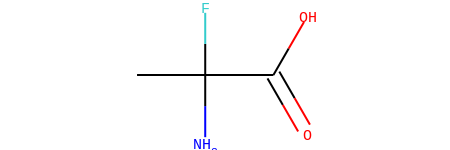

In [0]:
bS1 = Chem.MolFromSmiles('NC(C)(F)C(=O)O')
S1

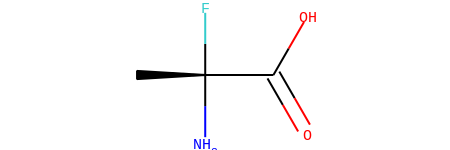

In [0]:
m = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
m

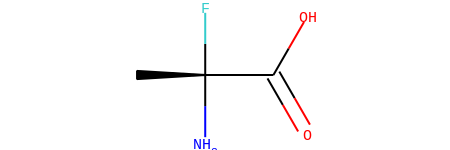

In [0]:
m = Chem.MolFromSmiles('N[C@@](F)(C)C(=O)O')
m

In [0]:
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@](N)(C)C(=O)O'),useChirality=True) # 이 둘의 구조가 같은지 확인

True

### 4.4 일반적인 카이랄 규칙(General Chiral Sepcification)

* 많은 종류의 카이랄성이 존재하며, '@'기호를 사용함으로써 카이랄을 나타냈습니다.
* SMILES에서 사용하는 일반적 카이랄 규격은 3부분이 있습니다:
  1. '@'기호
  2. 잇따르는 두 글자의 카이랄 표시
  3. 잇따르는 수치해석적인 카이랄 지정자
* 가장 기초가 되는 카이랄 class는 각각의 degree(연결의 수)입니다.
       4개의 연결에 기초가 되는 class는 사면체(TH)입니다.
* 대부분의 경우 @1표시는 SMILES의 순서를 기준으로 한 축에 반시계 방향으로 @2표시는 시계방향을 의미합니다.
* '@@'와 '@@@'는 각각 '@2','@3'와 같습니다.
* 위에서 사용된 '@'와 '@@'는 '@TH1'과 '@TH2'를 간략하게 표현한 것입니다.
* SMILES은 모든 범위에 관한 카이랄 규격을 다룹니다.('감소된 카이랄성', '퇴화된 카이랄성') 따라서 정확하게 알고 있는 모든 것을 보장하는 언어입니다.
* 이 섹션의 마지막 부분에선 사면체, 알렌식(allen-like), 사각평면, trigonal-bypyramidal, octahedral의 카이랄성에 제한될 것입니다. 비록 많은 카이랄성은 위의 체계로 다룰 수 있겠지만, 이러한 5개의 클래스는 화학에서 매우 흔하고, 자주 다뤄지는 부분입다.

* Tetrahedral:TH라는 기호로 표시되며, 4방위가 붙어있는 카이랄 클래스의 default입니다.

* Allen-like:AL의 기호로 표시되며, 카이랄 중심이 이중결합으로 연결된 2개가 붙어있는 카이랄 클래스의 default입니다. 비록 C=C=C의 구조가 가장 흔하나, C=C=C=C=C 구조들도 또한 allen-like입니다. 이중결합된 원자가 일렬로 짝수개가 연결된 것입니다.

![AL](http://www.daylight.com/dayhtml/doc/theory/theory18.gif) | ![substituted](http://www.daylight.com/dayhtml/doc/theory/theory19.gif)
---- | ----
OC(Cl)=$[C@]$=C(C)F | OC=$[C@]$=CF
OC(Cl)=$[C@AL1]$=C(C)F | OC($[H]$)=$[C@AL1]$=C($[H]$)F

In [0]:
m = Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')
m.HasSubstructMatch(Chem.MolFromSmiles('OC(Cl)=[C@@]=C(F)C'),useChirality=True) # 카이랄성이 일치하는지 확인

True

* 사각평면 : SP 기호로 표시
@SP1,@SP2, @SP3; 4방위가 연결된 카이랄 class의 default는 아니고, 줄이는 표현 또한 없습니다. 또한 시계와 반시계방향이 없는 점이 특징입니다.

![SP](http://www.daylight.com/dayhtml/doc/theory/theory20.gif) | -
---- | ----
F$[Po@SP1]$(Cl)(Br)I | (SP1 lists in a "U shape")
F$[Po@SP2]$(Br)(Cl)I | (SP2 lists in a "4-shape")
F$[Po@SP3]$(Cl)(I)Br | (SP3 lists in a "Z shape")

* Trigonal-bipyramidal:TB기호로 사용합니다. 5개의 방향의 카이랄 class의 default입니다.

  ![TB](http://www.daylight.com/dayhtml/doc/theory/theory21.gif)

  S$[As@@]$(F)(Cl)(Br)C=O<br>
  O=C$[As@]$(F)(Cl)(Br)S<br>

In [0]:
m = Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](Cl)(Br)(F)S'),useChirality=True)

True

In [0]:
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S'),useChirality=True)

True

* *Octahedral* : OH기호로 사용. 6개의 방향의 카이랄 class의 default입니다.
>가능한 값은 @OH1~ @OH2 : @OH1(or @)는 한 개의 축이 다른 것과 연결을 SMILE에 의해 나열될 때, 4개의 중간, 수평적으로 연결된 원자들을 시계방향으로 나열시킨 것.;@OH2(or @@)는 시계방향

  ![OH](http://www.daylight.com/dayhtml/doc/theory/theory22.gif)<br>
S$[Co@@]$(F)(Cl)(Br)(I)C=O<br>
O=C$[Co@]$(F)(Cl)(Br)(I)S

## 5. SMILES의 관례(MILES Convention)

### 5.1 Hydrogens

수소 원자는 대부분 생략됩니다.
일반적으로 3가지 방법으로 수소 원자를 표시합니다.
 - 암시적 표시 : '[',     ']' 으로 표시되지 않은 원자가 원소들
 - 명확한 표시 : '[',     ']' 안에 정확한 갯수와 함께 표시
 - 하나의 수소 원자 : [H]
 
그리고 반드시 수소원자를 명확히 표시해야할 때가 있습니다.
 - 전하를 띄는 수소 : [H+]
 - 수소 분자 : [H][H]
 - 하나 이상의 다른 원자에 연결된 수소 : bridging hydrogens
 - 동위원소 수소  : heavy water [2H]O[2H]


RDKit WARNING: [08:30:10] WARNING: not removing hydrogen atom without neighbors


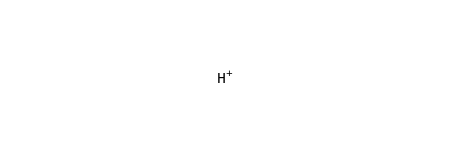

In [0]:
m = Chem.MolFromSmiles('[H+]')
m

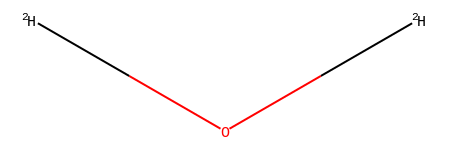

In [0]:
heavywater = Chem.MolFromSmiles('[2H]O[2H]')
heavywater

### 5.2  방향족(Aromaticity)

- 분자의 대칭성을 특징짓기 위해서 SMILES 같은 시스템에서 명확한 명명법을 생성할 수 있어야합니다. <br>
- 정확한 방향족 판단 알고리즘이 있는 경우에, 사용자가 지방족 구조를 입력하고 싶을때 방향족 구조식으로 입력할 필요가 없습니다.<br>
- 원하는 화합물을 짧게 명시할 수 있다.

SMILES은 Hueckel 규칙의 확장 된 버전을 사용하여 방향족 분자와 이온을 식별합니다.

> Hueckel's Rule
> 1. 분자는 고리를 가져야합니다.
> 2. 고리의 모든 원자는 같은 평면에 있어야합니다.
> 3. 고리의 모든 원자는 **fully conjugated** 이어야합니다.(모든 원자가 p 오비탈을 가진다.)
> 4. 분자는 (4n+2)개의 $\pi$ 전자를 가집니다. ( n은 0 보다 크거나 같은 정수 ) <br>
4번만 만족하지 않는 화합물을 **antiaromatic** 이라고 합니다.



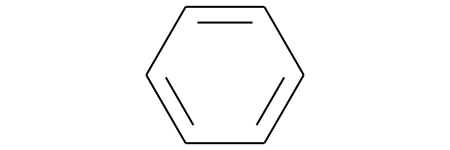

In [0]:
H = Chem.MolFromSmiles('c1ccccc1') # Aromatic
H

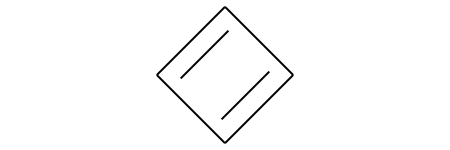

In [0]:
H = Chem.MolFromSmiles('c1ccc1') # Aromatic
H

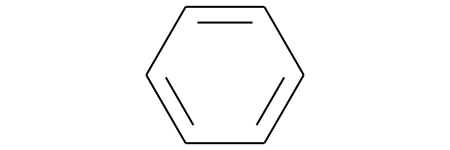

In [0]:
K = Chem.MolFromSmiles('C1=CC=CC=C1') # Aliphatic
K

특히, c1ccc1 (탄소 4개)와 c1ccccccc1 (탄소 8개)의 입력은 C1=CC=C1 및 C1=CC=CC=CC=CC=C1에 대한 정확한 *anti-aromatic* 구조를 생성할 것입니다. 위의 Hueckel's rule의 4번째 규칙에만 만족하지 않기 떄문입니다. 그러한 경우 SMILES 시스템은 내재된 sp2 혼합, 내재된 수소 수 및 지정된 공식 전하가 있는 경우 보존되는 구조를 찾습니다.<br>
그러나 c1cccc1과 같은 일부 입력은 부정확할 뿐만 아니라 불가능할 수도 있습니다. 여기서 c1cccc1은 C1=CCC=C1로 변환할 수 없는데, 그 이유는 탄소 원자 중 하나는 두 개의 히드로겐이 부착된 sp3이기 때문입니다.<br>
그러한 구조물에서는 단일 및 이중 결합을 번갈아 배치할 수 없기 때문에 SMILES은 **Impossible**으로 표시할 것입니다.<br>

다음 목록에 있는 원자만 방향족으로 고려할 수 있다 : C, N, O, P, S, As, Se 및 *wildcard*.

![a](http://www.daylight.com/dayhtml/doc/theory/theory27.gif)|![b](http://www.daylight.com/dayhtml/doc/theory/theory28.gif)|![c](http://www.daylight.com/dayhtml/doc/theory/theory29.gif)
----|----|----
C1=COC=C1|C1=CN=C[NH]C(=O)1|C1=C*=CC=C1
c1cocc1|c1cnc[nH]c(=O)1|c1c*ccc1

## 5.3 Aromatic Nitrogen Compounds

방향성 질소는 모두 방향성 질소 기호 n으로 지정할 수 있습니다. 
 - 피리딘 (Pyridine)
 - 피리딘-N-산화물 (Pyridine-N-oxide)
 - 피롤 (Methyl and 1H-pyrrole)

![a](http://www.daylight.com/dayhtml/doc/theory/theory23.gif)|![b](http://www.daylight.com/dayhtml/doc/theory/theory24.gif)|![c](http://www.daylight.com/dayhtml/doc/theory/theory25.gif)
----|----|----
n1ccccc1 | O=n1ccccc1 _ _ [O-][n+]1ccccc1	 |  Cn1cccc1 _ _ _ [nH]1cccc1
Pyridine | Pyridine-N-oxide	 | Methyl and 1H-pyrrole

> 1-1H-pyrrole의 질소는 pyridyl-N와 구별하기 위해 [nH]로 쓰여져 있습니다.

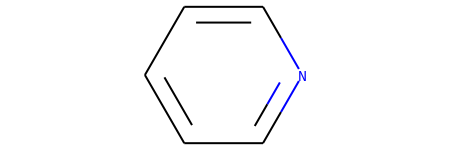

In [0]:
N = Chem.MolFromSmiles('n1ccccc1')
N

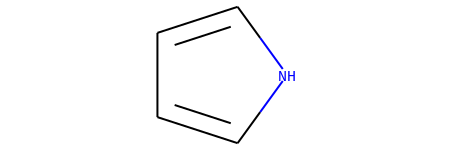

In [0]:
N2 = Chem.MolFromSmiles('[nH]1cccc1')
N2

## 5.4 Bonding Conventions

SMILES의 장점 : 동일한 구조를 다양한 모델로 설명, 분자속 어떤 원자의 전하도 나타낼 수 있습니다.
> 니트로메탄(Nitromethane) : `CN(=O)=O`    또는   `C[N+](=O)[O-]`

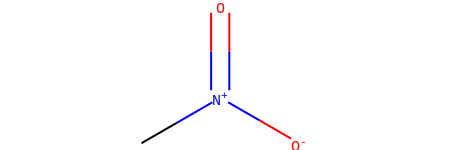

In [0]:
N3 = Chem.MolFromSmiles('CN(=O)=O')
N3

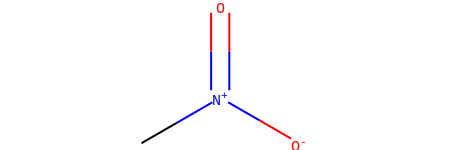

In [0]:
N4 = Chem.MolFromSmiles('C[N+](=O)[O-]')
N4

## 5.5 Tautomers

![a](http://www.daylight.com/dayhtml/doc/theory/theory26.gif)|-
-----------|-----------
O=c1[nH]cccc1 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | Oc1ncccc1
2-pyridone _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | 2-pyridinol

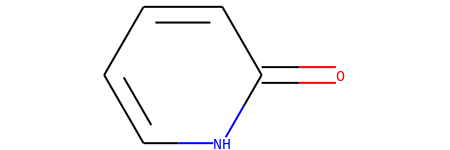

In [0]:
T1 = Chem.MolFromSmiles('O=c1[nH]cccc1')
T1

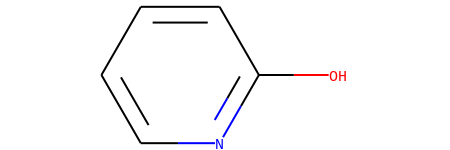

In [0]:
T2 = Chem.MolFromSmiles('Oc1ncccc1')
T2

## 6.반응식(Extensions for Reactions(>))

 반응식의 SMILES 언어 <br>
```
`Reactant` > `Agent` > `Product`
`Reactant` >> `Product`
```
아래의 예시는 하나의 같은 반응을 의미합니다.


* C=CCBr >> C=CCI <br>
* [I-].[Na+].C=CCBr >> [Na+].[Br-].C=CCI <br>
* C=CCBr.[Na+].[I-] > CC(=O)C > C=CCI.[Na+].[Br-] <br>

그러나 이 반응에서 어느 위치의 `C`에 반응하는지 알 수 없습니다. 때문에 `Atom Maps`가 필요합니다.

![ReactionsNoMaps](http://www.daylight.com/dayhtml/doc/theory/disp.gif)

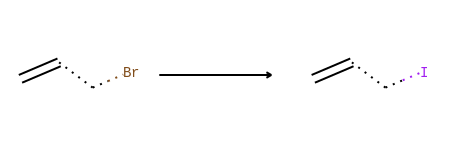

In [0]:
rxn = AllChem.ReactionFromSmarts('C=CCBr>>C=CCI')
rxn

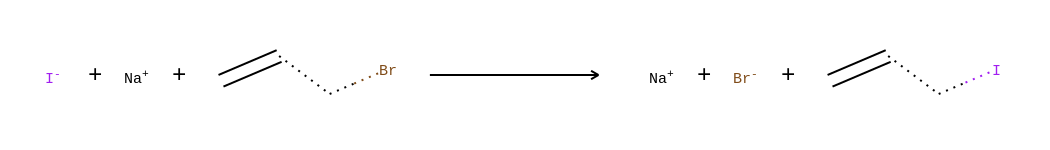

In [0]:
rxn = AllChem.ReactionFromSmarts('[I-].[Na+].C=CCBr >> [Na+].[Br-].C=CCI ')
rxn

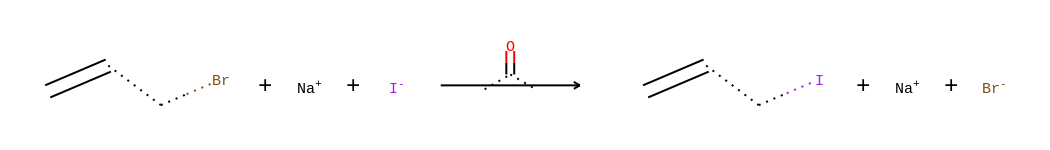

In [0]:
rxn = AllChem.ReactionFromSmarts('C=CCBr.[Na+].[I-] > CC(=O)C > C=CCI.[Na+].[Br-] ')
rxn

## 6.1 Reaction Atom Maps

`Atom Map`은 컴퓨터가 반응물과 생성물사이의 같은 원자임을 알 수 있게 명확하게 표현해주는 방법입니다.

* 원하는 원자의 뒤에 `:`와 숫자를 이용해 표시합니다. ( `[CH3:2]` 는 `H`를 3개 가지고 있는 탄소에 2번을 부여함을 의미합니다.  )
* 부여한 숫자는 추가적인 성질을 나타내지 않습니다. 단지 구분짓기 위함입니다. ( 단, 모든 원자에 같은 숫자를 부여할 경우는 제외. )

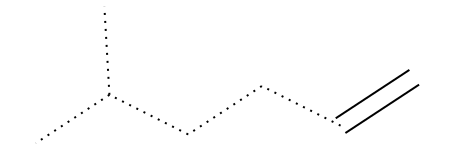

In [0]:
#Smarts로 표기
mol = AllChem.MolFromSmarts('C=CCCC(C)C')  # [CH2]=[CH][CH2][CH2][C](C)[CH2]
mol

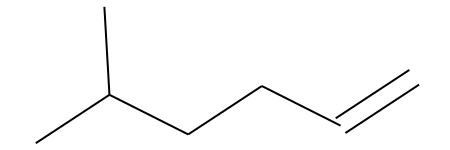

In [0]:
mol = AllChem.MolFromSmiles('C=CCCC(C)C')  # [CH2]=[CH][CH2][CH2][C](C)[CH2]
mol

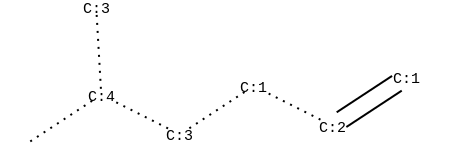

In [0]:
mol = AllChem.MolFromSmarts('[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]')
mol

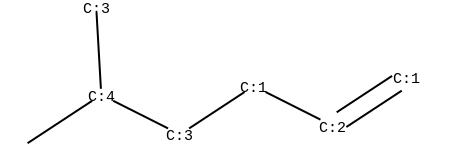

In [0]:
mol = AllChem.MolFromSmiles('[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]')
mol

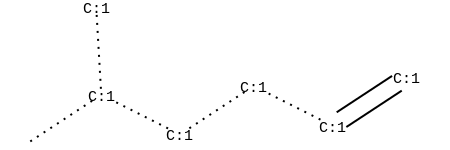

In [0]:
mol = AllChem.MolFromSmarts('[CH2:1]=[CH:1][CH2:1][CH2:1][C:1](C)[CH2:1]')
mol

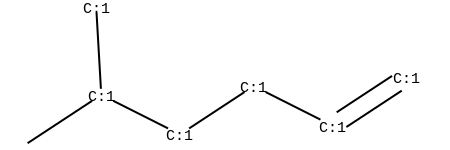

In [0]:
mol = AllChem.MolFromSmiles('[CH2:1]=[CH:1][CH2:1][CH2:1][C:1](C)[CH2:1]')
mol

### **Atom Map은 유일하거나 완전하지 않습니다.**

1. 반응이 일어날 때, 분자에 결합을 표현하는데 한계가 있습니다. <br>
예를들어 *Sodium Acetate* ( `CC(=O)[O-].[Na+]` ) 속의 산소원자를 화학적으로 구분할 수 없는데, *toolkit* 은 구별해주어야합니다.<br>
몇몇 시스템은 이런 동등함을 인정하는데, 이러한 경우에  같은 숫자로  `Mapping`합니다. ( `[CH3:1][C:2](=[O:3])[O-:3].[Na+:4]` )

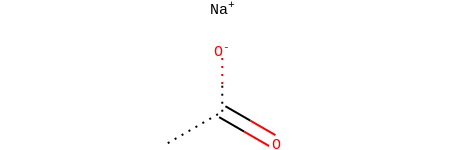

In [0]:
mol = AllChem.MolFromSmarts('CC(=O)[O-].[Na+]')
mol

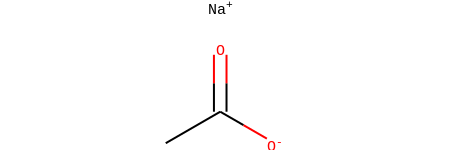

In [0]:
mol = AllChem.MolFromSmiles('CC(=O)[O-].[Na+]')
mol

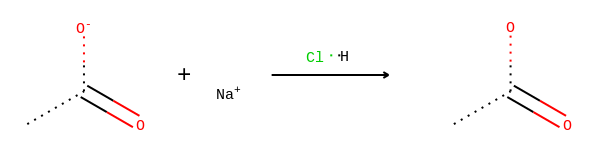

In [0]:
rxn = AllChem.ReactionFromSmarts('CC(=O)[O-].[Na+]>[H]Cl>CC(=O)O')
rxn

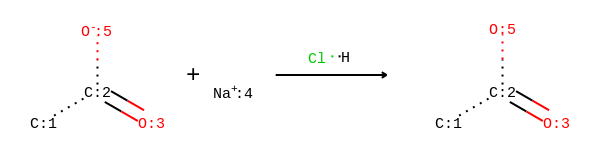

In [0]:
rxn = AllChem.ReactionFromSmarts('[CH3:1][C:2](=[O:3])[O-:5].[Na+:4]>[H]Cl>[CH3:1][C:2](=[O:3])[OH:5]')
rxn

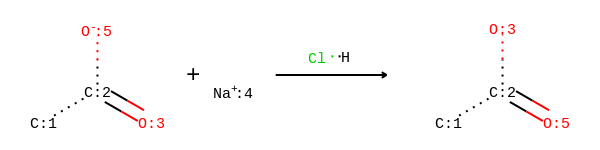

In [0]:
rxn = AllChem.ReactionFromSmarts('[CH3:1][C:2](=[O:3])[O-:5].[Na+:4]>[H]Cl>[CH3:1][C:2](=[O:5])[OH:3]')
rxn

2. 반응매커니즘이 애매할 때 (예를들어)<br> ![secondcase](http://www.daylight.com/dayhtml/doc/theory/cope.gif) <br>
이 경우 실제로는 두가지의 다른 반응 매커니즘이 있지만,  `[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]`으로 표현해줍니다.

3. 반응에 대한 정보가 부족한 경우. <br>
확실한 정보에 대해서 부분적으로만 `Mapping`합니다. 절대로 모르는 반응에 입력하려하면 안 됍니다.<br>
`Atom Map`은 `unique SMILES`에서 나타나지않습니다. <br>
4. `Atom Map`은 어떤 의미도 가지지않는 숫자일 뿐입니다.



## 6.2 Hydrogens

수소는 특별한 경우가 아니면 분자안에 숨어있습니다. 전하를 띄거나, 동위원소, 다른 수소와 결합, 다중결합을 하는 특별한 경우에 수소의 `atom map`이 필요하며, 이를 입력하면 수소를 `special`로 간주합니다.

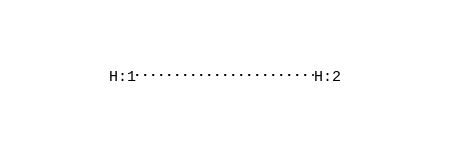

In [0]:
mol = AllChem.MolFromSmarts('[H:1][H:2]')
mol